In [31]:
%load ../rapaio-bootstrap

In [32]:
RandomSource.setSeed(42)

In [33]:
// Wilson
private static double center(double phat, double z, double n) {
    return (phat + z * z / (2 * n)) / (1 + z * z / n);
}

private static double delta(double phat, double z, double n) {
    return z / (1 + z * z / n) * Math.sqrt(phat * (1 - phat) / n + z * z / (4 * n * n));
}

public static double lbound(double q, double k, double n) {
    double z = Normal.std().quantile(q);
    double phat = k / n;
    return center(phat, z, n) - delta(phat, z, n);
}

public static double ubound(double q, double k, double n) {
    double z = Normal.std().quantile(q);
    double phat = k / n;
    return center(phat, z, n) + delta(phat, z, n);
}

In [34]:
int N = 100_000

In [35]:
int NMAX = 1000

In [36]:
VarInt ns = VarInt.from(N, row -> RandomSource.nextInt(NMAX)+1)

In [37]:
VarDouble ps = VarDouble.from(N, row -> RandomSource.nextDouble())/
    

In [38]:
VarDouble xs = VarDouble.from(N, i -> Binomial.of(ps.getDouble(i), ns.getInt(i)).sampleNext())

In [39]:
VarDouble phat = VarDouble.from(N, i -> xs.getDouble(i)/ns.getDouble(i))

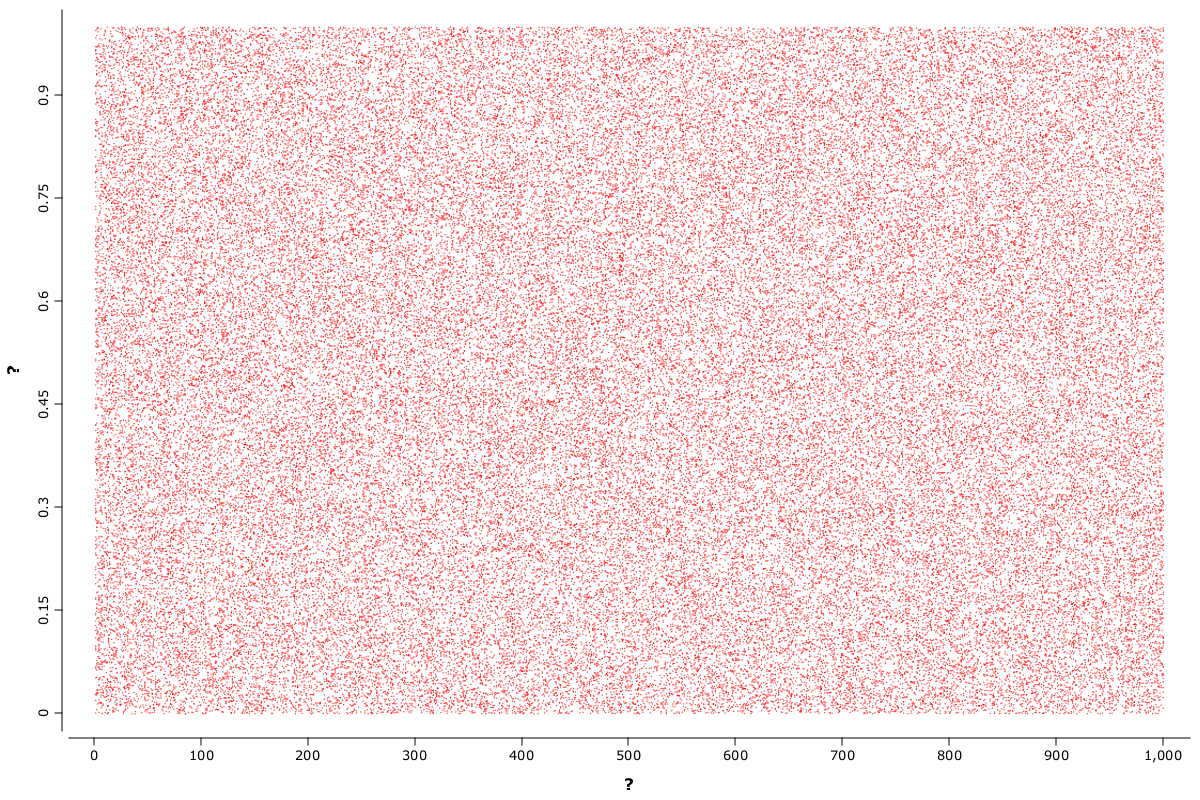

In [94]:
WS.image(points(ns, ps, sz(0.2), color('r')), 1200, 800)

In [70]:
VarDouble lbound = VarDouble.from(N, i -> lbound(0.95, xs.getDouble(i), ns.getDouble(i)))

In [71]:
double t = 0.04

In [72]:
var confusion = Confusion.from(VarNominal.from(N, i -> ps.getDouble(i)>t ? "1" : "0"), VarNominal.from(N, i -> lbound.getDouble(i)>t ? "1" : "0"))

In [93]:
confusion.printString()

ConfusionMatrix(levels:?,1,0)


In [88]:
Confusion method(double t, double q) {
    VarDouble lbound = VarDouble.from(N, i -> lbound(q, xs.getDouble(i), ns.getDouble(i)));
    var confusion = Confusion.from(VarNominal.from(N, i -> ps.getDouble(i)>t ? "1" : "0"), VarNominal.from(N, i -> lbound.getDouble(i)>t ? "1" : "0"));
    return confusion;
}

In [89]:
method(0.04,0.5).precision()

0.9960055211644637

In [90]:
method(0.04,0.5).recall()

0.9923839093153853

In [92]:
method(0.5,0.5).printSummary()

> Confusion matrix
 - Frequency table
Ac\Pr |       1       0 |   total 
----- |       -       - |  -----  
    1 | >48,890   1,257 |  50,147 
    0 |   1,125 >48,728 |  49,853 
----- |       -       - |  -----  
total |  50,015  49,985 | 100,000 
 - Probability table
Ac\Pr |      1      0 | total 
----- |      -      - | ----- 
    1 | >0.489  0.013 | 0.501 
    0 |  0.011 >0.487 | 0.499 
----- |      -      - | ----- 
total |  0.500  0.500 | 1.000 


Complete cases 100000 from 100000
Acc: 0.97618         (Accuracy )
F1:  0.9762185         (F1 score / F-measure)
MCC: 0.9523633         (Matthew correlation coefficient)
Pre: 0.9775067         (Precision)
Rec: 0.9749337         (Recall)
G:   0.9762194         (G-measure)

